<a href="https://colab.research.google.com/github/klncgty/Home_Credit_Default/blob/main/HOME_CREDIT_DEFAULT_RISK.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **İMPORT İŞLEMLERİ**


In [1]:
pip install missingno

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
pip install lightgbm

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
pip install catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [4]:
#@title import 2
import joblib
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_validate, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

pd.set_option('display.max_columns', None)
pd.set_option('display.width', 500)

In [5]:
pip install xgboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [6]:
#@title import
from matplotlib import pyplot as plt
import pandas as pd 
import numpy as np
import matplotlib
from sklearn.metrics import roc_curve,auc
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 
import sys
import warnings
warnings.filterwarnings("ignore")
pd.pandas.set_option('display.max_columns', None)
import missingno as msno
from datetime import date
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.neighbors import LocalOutlierFactor
from sklearn.preprocessing import MinMaxScaler, LabelEncoder, StandardScaler, RobustScaler
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.float_format', lambda x: '%.3f' % x)
pd.set_option('display.width', 500)
pd.set_option('display.expand_frame_repr', False)
import warnings
from sklearn.model_selection import GridSearchCV, cross_validate, RandomizedSearchCV, validation_curve

#from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
#from catboost import CatBoostClassifier


pd.set_option('display.max_columns', None)
pd.set_option('display.width', 500)

warnings.simplefilter(action='ignore', category=Warning)
import joblib

from lightgbm import LGBMClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_validate, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale

In [7]:
#@title ONE-HOT FONKSİYON
def one_hot_encoder(df, nan_as_category = True):
    original_columns = list(df.columns)
    categorical_columns = [col for col in df.columns if df[col].dtype == 'object']
    df = pd.get_dummies(df, columns= categorical_columns, dummy_na= nan_as_category)
    new_columns = [c for c in df.columns if c not in original_columns]
    return df, new_columns

In [41]:
#@title BASE MODEL FONKSİYON
def base_models(X, y, scoring="roc_auc"):
    print("Base Models....")
    classifiers = [('LR', LogisticRegression()),
                   ('KNN', KNeighborsClassifier()),
                   ("SVC", SVC()),
                   ("CART", DecisionTreeClassifier()),
                   ("RF", RandomForestClassifier()),
                   ('Adaboost', AdaBoostClassifier()),
                   ('GBM', GradientBoostingClassifier()),
                   ('XGBoost', XGBClassifier(use_label_encoder=False, eval_metric='logloss')),
                   ('LightGBM', LGBMClassifier()),
                   ('CatBoost', CatBoostClassifier(verbose=False))
                   ]

    for name, classifier in classifiers:
        cv_results = cross_validate(classifier, X, y, cv=5, scoring="roc_auc", error_score="raise")
        print(f"{scoring}: {round(cv_results['test_score'].mean(), 4)} ({name}) ")


In [23]:
#@title  grab_col_names
def grab_col_names(dataframe, cat_th=60, car_th=20):
   
    # cat_cols, cat_but_car
    cat_cols = [col for col in dataframe.columns if dataframe[col].dtypes == "O"]
    num_but_cat = [col for col in dataframe.columns if dataframe[col].nunique() < cat_th and
                   dataframe[col].dtypes != "O"]
    cat_but_car = [col for col in dataframe.columns if dataframe[col].nunique() > car_th and
                   dataframe[col].dtypes == "O"]
    cat_cols = cat_cols + num_but_cat
    cat_cols = [col for col in cat_cols if col not in cat_but_car]

    # num_cols
    num_cols = [col for col in dataframe.columns if dataframe[col].dtypes != "O" and dataframe[col].nunique() > cat_th]
    num_cols = [col for col in num_cols if col not in num_but_cat and "SK_ID_CURR" not in col]
    cat_cols = [col for col in cat_cols if "TARGET" not in col]
    # print(f"Observations: {dataframe.shape[0]}")
    # print(f"Variables: {dataframe.shape[1]}")
    # print(f'cat_cols: {len(cat_cols)}')
    # print(f'num_cols: {len(num_cols)}')
    # print(f'cat_but_car: {len(cat_but_car)}')
    # print(f'num_but_cat: {len(num_but_cat)}')
    return cat_cols, num_cols, cat_but_car

In [10]:
#@title missing_values_table
def missing_values_table(df):
        # Toplam eksik değer sayısı
        mis_val = df.isnull().sum()
        
        # Eksik değerlerin yüzdeliği
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        
        # Eksik değer tablosu
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        # Sütunlarıadlandırma
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        # Tabloyu yüzdelik olarak azalacak şekilde ayarlama
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        
        # Bilgi çıktısı
        print ( "Bu veri setinde" + str(df.shape[1]) + "kadar değişken var"  + str(mis_val_table_ren_columns.shape[0]) + "kadar değişkende eksik değer var" )
        # Çıktı
        return mis_val_table_ren_columns

In [11]:
#@title Plot Fonksiyon (her bir değişken özelinde default analizi)
def plot_stats(feature,label_rotation=False,horizontal_layout=True):
    temp = df_app_train[feature].value_counts()
    df1 = pd.DataFrame({feature: temp.index,'Number of contracts': temp.values})

    # Her bir değişken özelinde target=1 oranı
    cat_perc = df_app_train[[feature, 'TARGET']].groupby([feature],as_index=False).mean()
    cat_perc.sort_values(by='TARGET', ascending=False, inplace=True)
    
    if(horizontal_layout):
        fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12,6))
    else:
        fig, (ax1, ax2) = plt.subplots(nrows=2, figsize=(12,14))
    sns.set_color_codes("pastel")
    s = sns.barplot(ax=ax1, x = feature, y="Number of contracts",data=df1)
    
    if(label_rotation):
        s.set_xticklabels(s.get_xticklabels(),rotation=90)
    
    s = sns.barplot(ax=ax2, x = feature, y='TARGET', order=cat_perc[feature], data=cat_perc)
    
    if(label_rotation):
        s.set_xticklabels(s.get_xticklabels(),rotation=90)
    plt.ylabel('Percent of target with value 1 [%]', fontsize=10)
    plt.tick_params(axis='both', which='major', labelsize=10)

    plt.show();

In [15]:
#@title İKİ VERİ SETİNDEKİ FARKLI DEĞERLERİ BULMA
for c in df_app_train.columns[df_app_train.dtypes == "O"]:
    c_train = set(df_app_train[c].unique())
    c_test = set(df_app_test[c].unique())
    diff = c_train ^ c_test
    if len(diff) > 0:
        print('feature ' + c + ' has different values: ', diff)

feature CODE_GENDER has different values:  {'XNA'}
feature NAME_INCOME_TYPE has different values:  {'Maternity leave'}
feature NAME_FAMILY_STATUS has different values:  {'Unknown'}


In [17]:
#@title İki seti eşitleme
###test datada olmayan değişkenleri train datada da olmaması için align yapıyoruz
## target değişkenimizi ayrı tuttum. daha sonra tekrar train dataya soktum
train_labels = df_app_train['TARGET']

df_app_train, df_app_test = df_app_train.align(df_app_test, join = 'inner', axis = 1)


df_app_train['TARGET'] = train_labels

print('Training seti shape: ', df_app_train.shape)
print('Testing seti shape: ', df_app_test.shape)

Training seti shape:  (307511, 122)
Testing seti shape:  (48744, 121)


In [14]:
df_app_train = pd.read_csv("/content/application_train.csv")
df_app_test = pd.read_csv("/content/application_test.csv")

In [ ]:
df = pd.read_csv('/content/application_train.csv', nrows= num_rows)
    test_df = pd.read_csv('/content/application_test.csv', nrows= num_rows)
    print("Train samples: {}, test samples: {}".format(len(df), len(test_df)))
    df = df.append(test_df).reset_index()

## **KEŞİFÇİ VERİ ANALİZİ** APPLİCATİON_TRAİN

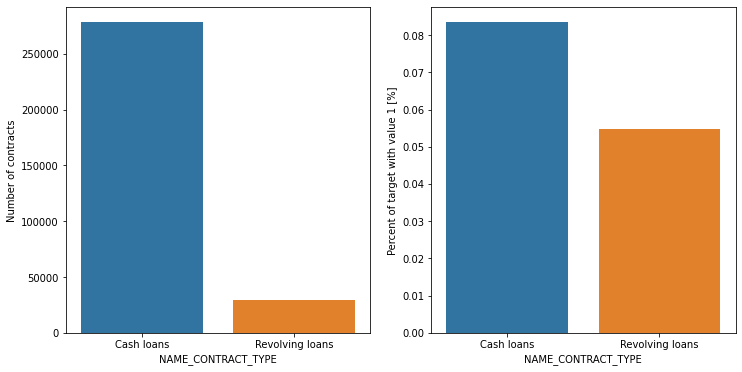

In [18]:
plot_stats('NAME_CONTRACT_TYPE')

In [ ]:
plot_stats('CODE_GENDER')

##### 
# En fazla kredi kontratı yapanlar kadınlar. Fakat en fazla default durumu olan ise erkekler

In [ ]:
plot_stats('OCCUPATION_TYPE',True, True)

In [ ]:
plot_stats('CNT_CHILDREN')


#######
# En fazla müşteri çocuğu olmayan kişiler. Fakat neredeyse 9-11 çocuklu ailelerin default durumu %100. 
# 6 Çocuklu aile bunu takip ediyor.

In [ ]:
plot_stats('CNT_FAM_MEMBERS',True)


######
# 2 kişilik aileler müşteri olarak diğerlerine nazaran en fazla.
# 11 ve 13 kişilik ailelerin krediyi geri ödememe durumu neredeyse %100 

In [ ]:
plot_stats('NAME_INCOME_TYPE',True,True)

#######
# En fazla müşteri çalışan kesim. 
# Annelik izni de gelir türü olarak gösterilmiş.
# Annelik izni alanlar ve işsizler krediyi ödememe oranları neredeyse birbirine yakın ve %40 larda
# Emeklilier en çok krediyi kullanlar sırasında ortalama bir yerde ve geri ödeme konusunda da %95 oranında başarı var.

In [ ]:
plot_stats('NAME_HOUSING_TYPE',True,True)

######
# 

In [ ]:
#### tipi object olan değişkenlerin eşsiz değer sayısı

df_app_train.select_dtypes('object').apply(pd.Series.nunique, axis = 0)

In [ ]:
df_app_train["DAYS_BIRTH"].describe().T

In [ ]:
correlations = df_app_train.corr()['TARGET'].sort_values()

print('en pozitif korelasyonlular:\n', correlations.tail(20))
print('\en negatif korelasyonlular :\n', correlations.head(15))


#########
# EXT_SOURCE ne bilmiyorum fakat bu değişken ile target değişkeni arasında yüksek bir negatif korelasyon var
# EXT_SOURCE yüksek müşterinin geri ödeme yapma ihtimali daha yüksek.
# az da olsa yaş ile de aynı şekilde bir negatif korelasyon var. yani yaş değişkeni yükseldikçe  krdi geri ödeme oranı artıyor.


### **PREPROCESSING-FEATURING**

In [19]:
df_app_train["DAYS_BIRTH"] = df_app_train["DAYS_BIRTH"]/-365

In [20]:
df_app_train['CODE_GENDER'].replace('XNA',np.nan, inplace=True)
df_app_train['ORGANIZATION_TYPE'].replace('XNA',np.nan, inplace=True)
df_app_train['DAYS_EMPLOYED'].replace(365243,np.nan, inplace=True)
df_app_train['INCOME_PER_PERSON'] = df_app_train['AMT_INCOME_TOTAL'] / df_app_train['CNT_FAM_MEMBERS']
df_app_train["INCOME_PER_CHILD"] = df_app_train["AMT_INCOME_TOTAL"] / df_app_train["CNT_CHILDREN"]
df_app_train["INCOME_PER_CHILD"] = df_app_train["AMT_INCOME_TOTAL"] / (1 + df_app_train["CNT_CHILDREN"])
df_app_train["EMPLOYED_BIRTH_DAYS"] = df_app_train["DAYS_EMPLOYED"] / df_app_train["DAYS_BIRTH"]
df_app_train['NEW_SOURCES_PROD'] = df_app_train['EXT_SOURCE_1'] * df_app_train['EXT_SOURCE_2'] * df_app_train['EXT_SOURCE_3']
df_app_train['NEW_EXT_SOURCES_MEAN'] = df_app_train[['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3']].mean(axis=1)
df_app_train['NEW_SCORES_STD'] = df_app_train[['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3']].std(axis=1)
df_app_train["DAYS_LAST_PHONE_CHANGE"] = df_app_train["DAYS_LAST_PHONE_CHANGE"]/-1

In [21]:
 df_app_train, cat_cols = one_hot_encoder(df_app_train)

In [25]:
cat_cols, num_cols, cat_but_car = grab_col_names(df_app_train)

In [ ]:
num_cols

In [29]:
X_scaled = StandardScaler().fit_transform(df_app_train[num_cols])
df_app_train[num_cols] = pd.DataFrame(X_scaled, columns=df_app_train[num_cols].columns)

In [30]:
df_app_train.head()

,SK_ID_CURR,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,TARGET,INCOME_PER_PERSON,INCOME_PER_CHILD,EMPLOYED_BIRTH_DAYS,NEW_SOURCES_PROD,NEW_EXT_SOURCES_MEAN,NEW_SCORES_STD,NAME_CONTRACT_TYPE_Cash loans,NAME_CONTRACT_TYPE_Revolving loans,NAME_CONTRACT_TYPE_nan,CODE_GENDER_F,CODE_GENDER_M,CODE_GENDER_nan,FLAG_OWN_CAR_N,FLAG_OWN_CAR_Y,FLAG_OWN_CAR_nan,FLAG_OWN_REALTY_N,FLAG_OWN_REALTY_Y,FLAG_OWN_REALTY_nan,NAME_TYPE_SUITE_Children,NAME_TYPE_SUITE_Family,NAME_TYPE_SUITE_Group of people,NAME_TYPE_SUITE_Other_A,NAME_TYPE_SUITE_Other_B,"NAME_TYPE_SUITE_Spouse, partner",NAME_TYPE_SUITE_Unaccompanied,NAME_TYPE_SUITE_nan,NAME_INCOME_TYPE_Businessman,NAME_INCOME_TYPE_Commercial associate,NAME_INCOME_TYPE_Maternity leave,NAME_INCOME_TYPE_Pensioner,NAME_INCOME_TYPE_State servant,NAME_INCOME_TYPE_Student,NAME_INCOME_TYPE_Unemployed,NAME_INCOME_TYPE_Working,NAME_INCOME_TYPE_nan,NAME_EDUCATION_TYPE_Academic degree,NAME_EDUCATION_TYPE_Higher education,NAME_EDUCATION_TYPE_Incomplete higher,NAME_EDUCATION_TYPE_Lower secondary,NAME_EDUCATION_TYPE_Secondary / secondary special,NAME_EDUCATION_TYPE_nan,NAME_FAMILY_STATUS_Civil marriage,NAME_FAMILY_STATUS_Married,NAME_FAMILY_STATUS_Separated,NAME_FAMILY_STATUS_Single / not married,NAME_FAMILY_STATUS_Unknown,NAME_FAMILY_STATUS_Widow,NAME_FAMILY_STATUS_nan,NAME_HOUSING_TYPE_Co-op apartment,NAME_HOUSING_TYPE_House / apartment,NAME_HOUSING_TYPE_Municipal apartment,NAME_HOUSING_TYPE_Office apartment,NAME_HOUSING_TYPE_Rented apartment,NAME_HOUSING_TYPE_With parents,NAME_HOUSING_TYPE_nan,OCCUPATION_TYPE_Accountants,OCCUPATION_TYPE_Cleaning staff,OCCUPATION_TYPE_Cooking staff,OCCUPATION_TYPE_Core staff,OCCUPATION_TYPE_Drivers,OCCUPATION_TYPE_HR staff,OCCUPATION_TYPE_High skill tech staff,OCCUPATION_TYPE_IT staff,OCCUPATION_TYPE_Laborers,OCCUPATION_TYPE_Low-skill Laborers,OCCUPATION_TYPE_Managers,OCCUPATION_TYPE_Medicine staff,OCCUPATION_TYPE_Private service staff,OCCUPATION_TYPE_Realty agents,OCCUPATION_TYPE_Sales staff,OCCUPATION_TYPE_Secretaries,OCCUPATION_TYPE_Security staff,OCCUPATION_TYPE_Waiters/barmen staff,OCCUPATION_TYPE_nan,WEEKDAY_APPR_PROCESS_START_FRIDAY,WEEKDAY_APPR_PROCESS_ST

In [32]:
y.dtype

dtype('int64')

In [31]:
y = df_app_train["TARGET"]
X = df_app_train.drop(["TARGET", "SK_ID_CURR"], axis=1)

In [44]:
lgbm_model = LGBMClassifier(random_state=17)

In [45]:
cv_results = cross_validate(lgbm_model, X, y, cv=5, scoring=["accuracy", "f1", "roc_auc"])

In [46]:
cv_results['test_roc_auc'].mean()

0.7565396301007921

In [ ]:
lgbm_params = {"learning_rate": [0.01, 0.02, 0.05, 0.1],
               "n_estimators": [200, 300, 350, 400],
               "colsample_bytree": [0.9, 0.8, 1]}

lgbm_best_grid = GridSearchCV(lgbm_model, lgbm_params, cv=5, n_jobs=-1, verbose=True).fit(X, y)

In [ ]:
lgbm_final = lgbm_model.set_params(**lgbm_best_grid.best_params_, random_state=17).fit(X, y)

cv_results = cross_validate(lgbm_final, X, y, cv=5, scoring=["accuracy", "f1", "roc_auc"])


cv_results['test_roc_auc'].mean()

### **KEŞİFÇİ VERİ ANALİZİ**  credit_card_balance




In [59]:
df_c_b = pd.read_csv("/content/credit_card_balance.csv")

In [65]:
df_c_b.drop("SK_ID_PREV", axis=1, inplace=True)

In [74]:
df_c_b, cat_cols = one_hot_encoder(df_c_b, nan_as_category= True)

In [73]:
C_scaled = StandardScaler().fit_transform(df_c_b[num_cols])
df_c_b[num_cols] = pd.DataFrame(X_scaled, columns=df_c_b[num_cols].columns)

,SK_ID_CURR,MONTHS_BALANCE,AMT_BALANCE,AMT_CREDIT_LIMIT_ACTUAL,AMT_DRAWINGS_ATM_CURRENT,AMT_DRAWINGS_CURRENT,AMT_DRAWINGS_OTHER_CURRENT,AMT_DRAWINGS_POS_CURRENT,AMT_INST_MIN_REGULARITY,AMT_PAYMENT_CURRENT,AMT_PAYMENT_TOTAL_CURRENT,AMT_RECEIVABLE_PRINCIPAL,AMT_RECIVABLE,AMT_TOTAL_RECEIVABLE,CNT_DRAWINGS_ATM_CURRENT,CNT_DRAWINGS_CURRENT,CNT_DRAWINGS_OTHER_CURRENT,CNT_DRAWINGS_POS_CURRENT,CNT_INSTALMENT_MATURE_CUM,SK_DPD,SK_DPD_DEF,NAME_CONTRACT_STATUS_Active,NAME_CONTRACT_STATUS_Completed,NAME_CONTRACT_STATUS_Demand,NAME_CONTRACT_STATUS_Sent proposal,NAME_CONTRACT_STATUS_Signed,NAME_CONTRACT_STATUS_nan
0,378907,-6,56.970,135000,0.000,877.500,0.000,877.500,1700.325,1800.000,1800.000,0.000,0.000,0.000,0.000,1,0.000,1.000,35.000,0.000,0.000,1,0,0,0,0,0
1,363914,-1,63975.555,45000,2250.000,2250.000,0.000,0.000,2250.000,2250.000,2250.000,60175.080,64875.555,64875.555,1.000,1,0.000,0.000,69.000,0.000,0.000,1,0,0,0,0,0
2,371185,-7,31815.225,450000,0.000,0.000,0.000,0.000,2250.000,2250.000,2250.000,26926.425,31460.085,31460.085,0.000,0,0.000,0.000,30.000,0.000,0.000,1,0,0,0,0,0
3,337855,-4,236572.110,225000,2250.000,2250.000,0.000,0.000,11795.760,11925.000,11925.000,224949.285,233048.970,233048.970,1.000,1,0.000,0.000,10.000,0.000,0.000,1,0,0,0,0,0
4,126868,-1,453919.455,450000,0.000,11547.000,0.000,11547.000,22924.890,27000.000,27000.000,443044.395,453919.455,453919.455,0.000,1,0.000,1.000,101.000,0.000,0.000,1,0,0,0,0,0
